* Regression logistique

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Génération de données factices pour l'exemple
np.random.seed(0)
n_samples = 1000
heights = np.random.normal(170, 10, n_samples)  # Tailles en cm
weights = np.random.normal(70, 5, n_samples)   # Poids en kg

# Calcul de l'IMC (Indice de Masse Corporelle)
bmi = weights / ((heights / 100) ** 2)

# Définition des seuils pour la classification en "coupable" (1) et "innocent" (0) en fonction de l'IMC
threshold = 25  # Seuil pour l'IMC

# Attribution des labels en fonction de l'IMC
labels = (bmi > threshold).astype(int)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((heights, weights)), labels, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique
model = LogisticRegression()

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


Précision du modèle : 99.50%


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Génération de données factices pour l'exemple
np.random.seed(0)
n_samples = 1000
heights = np.random.normal(170, 10, n_samples)  # Tailles en cm
weights = np.random.normal(70, 5, n_samples)    # Poids en kg

# Calcul de l'IMC (Indice de Masse Corporelle)
bmi = weights / ((heights / 100) ** 2)

# Définition des seuils pour la classification (IMC > 25 → 1 sinon 0)
threshold = 25
labels = (bmi > threshold).astype(int)

# Division des données en ensembles d'entraînement et de test
X = np.column_stack((heights, weights))
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Création du modèle de régression logistique avec régularisation
# penalty = 'l2' : régularisation de type Ridge (par défaut)
# C = 1.0 : inverse de la force de régularisation (plus petit => régularisation plus forte)
# solver = 'lbfgs' : algorithme d’optimisation compatible avec L2
model = LogisticRegression(penalty='l2', C=0.5, solver='lbfgs', max_iter=1000, random_state=0)

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))

# Affichage des coefficients et de l'interception
print("Coefficients :", model.coef_)
print("Intercept :", model.intercept_)


Précision du modèle : 99.00%
Coefficients : [[-2.11276004  2.51061576]]
Intercept : [177.59575645]


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Génération de données factices pour l'exemple
np.random.seed(0)
n_samples = 1000
heights = np.random.normal(170, 10, n_samples)  # Tailles en cm
weights = np.random.normal(70, 5, n_samples)   # Poids en kg

# Calcul de l'IMC (Indice de Masse Corporelle)
bmi = weights / ((heights / 100) ** 2)

# Définition des seuils pour la classification en "coupable" (1) et "innocent" (0) en fonction de l'IMC
threshold = 25  # Seuil pour l'IMC

# Attribution des labels en fonction de l'IMC
labels = (bmi > threshold).astype(int)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((heights, weights)), labels, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique
model = LogisticRegression()

# Définir une grille de paramètres à rechercher
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2']  # Type de régularisation
}

# Créez un GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Entraînez le modèle sur les données d'entraînement avec recherche sur grille
grid_search.fit(X_train, y_train)

# Obtenez les meilleurs paramètres trouvés par la recherche sur grille
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Utilisez le modèle avec les meilleurs paramètres pour faire des prédictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Meilleurs paramètres : {'C': 10, 'penalty': 'l2'}
Précision du modèle : 99.50%


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

# Génération de données factices pour l'exemple
np.random.seed(0)
n_samples = 1000
heights = np.random.normal(170, 10, n_samples)  # Tailles en cm
weights = np.random.normal(70, 5, n_samples)   # Poids en kg

# Calcul de l'IMC (Indice de Masse Corporelle)
bmi = weights / ((heights / 100) ** 2)

# Définition des seuils pour la classification en "coupable" (1) et "innocent" (0) en fonction de l'IMC
threshold = 25  # Seuil pour l'IMC

# Attribution des labels en fonction de l'IMC
labels = (bmi > threshold).astype(int)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((heights, weights)), labels, test_size=0.2, random_state=42)

# Utilisation de SMOTE pour sur-échantillonner la classe minoritaire
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Créez un modèle de régression logistique
model = LogisticRegression()

# Définir une grille de paramètres à rechercher
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Paramètre de régularisation
    'penalty': ['l1', 'l2']  # Type de régularisation
}

# Créez un GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Entraînez le modèle sur les données d'entraînement sur-échantillonnées avec recherche sur grille
grid_search.fit(X_train_resampled, y_train_resampled)

# Obtenez les meilleurs paramètres trouvés par la recherche sur grille
best_params = grid_search.best_params_
print("Meilleurs paramètres :", best_params)

# Utilisez le modèle avec les meilleurs paramètres pour faire des prédictions sur les données de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle : {:.2f}%".format(accuracy * 100))


Meilleurs paramètres : {'C': 1, 'penalty': 'l2'}
Précision du modèle : 99.50%


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

* SVMs

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Génération de données factices pour l'exemple
np.random.seed(0)
n_samples = 1000
heights = np.random.normal(170, 10, n_samples)  # Tailles en cm
weights = np.random.normal(70, 5, n_samples)   # Poids en kg

# Calcul de l'IMC (Indice de Masse Corporelle)
bmi = weights / ((heights / 100) ** 2)

# Définition des seuils pour la classification en "coupable" (1) et "innocent" (0) en fonction de l'IMC
threshold = 25  # Seuil pour l'IMC

# Attribution des labels en fonction de l'IMC
labels = (bmi > threshold).astype(int)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((heights, weights)), labels, test_size=0.2, random_state=42)

# Créez un modèle SVM linéaire
model = SVC(kernel='linear')

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle SVM : {:.2f}%".format(accuracy * 100))


Précision du modèle SVM : 99.00%


* Arbres de décision

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Génération de données factices pour l'exemple
np.random.seed(0)
n_samples = 1000
heights = np.random.normal(170, 10, n_samples)  # Tailles en cm
weights = np.random.normal(70, 5, n_samples)   # Poids en kg

# Calcul de l'IMC (Indice de Masse Corporelle)
bmi = weights / ((heights / 100) ** 2)

# Définition des seuils pour la classification en "coupable" (1) et "innocent" (0) en fonction de l'IMC
threshold = 25  # Seuil pour l'IMC

# Attribution des labels en fonction de l'IMC
labels = (bmi > threshold).astype(int)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((heights, weights)), labels, test_size=0.2, random_state=42)

# Créez un modèle d'arbre de décision
model = DecisionTreeClassifier()

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle d'arbre de décision : {:.2f}%".format(accuracy * 100))


Précision du modèle d'arbre de décision : 97.50%


* Forêts aléatoires

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Génération de données factices pour l'exemple
np.random.seed(0)
n_samples = 1000
heights = np.random.normal(170, 10, n_samples)  # Tailles en cm
weights = np.random.normal(70, 5, n_samples)   # Poids en kg

# Calcul de l'IMC (Indice de Masse Corporelle)
bmi = weights / ((heights / 100) ** 2)

# Définition des seuils pour la classification en "coupable" (1) et "innocent" (0) en fonction de l'IMC
threshold = 25  # Seuil pour l'IMC

# Attribution des labels en fonction de l'IMC
labels = (bmi > threshold).astype(int)

# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(np.column_stack((heights, weights)), labels, test_size=0.2, random_state=42)

# Créez un modèle Random Forest
model = RandomForestClassifier()

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédictions sur les données de test
y_pred = model.predict(X_test)

# Évaluation de la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Précision du modèle Random Forest : {:.2f}%".format(accuracy * 100))


Précision du modèle Random Forest : 98.00%


* Kmeans

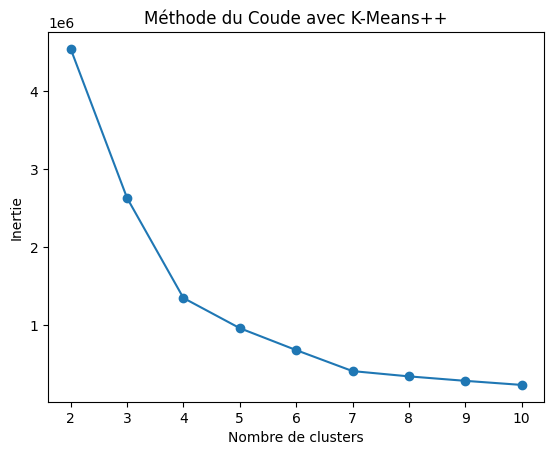

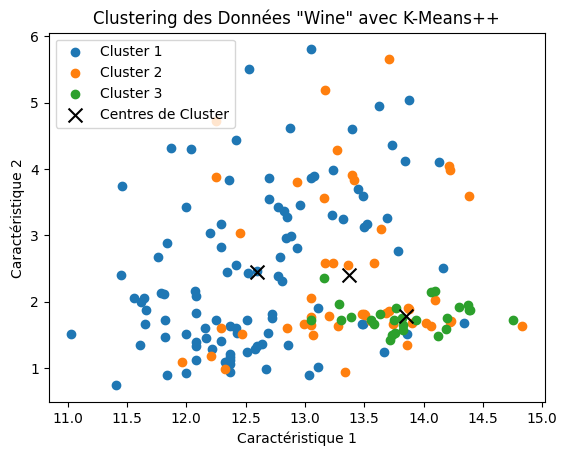

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Charger le jeu de données "Wine"
wine = load_wine()
data = wine.data

# Utilisation de la méthode du coude pour déterminer le nombre optimal de clusters
inertia_values = []
k_range = range(2, 11)  # Testez différentes valeurs de k

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# Affichage du coude pour déterminer le nombre optimal de clusters
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude avec K-Means++')
plt.show()

# Choix du nombre optimal de clusters (dans cet exemple, disons k=3)
optimal_num_clusters = 3

# Réalisation du clustering KMeans avec le nombre optimal de clusters et K-Means++ pour initialiser les centroids
kmeans = KMeans(n_clusters=optimal_num_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(data)

# Affichage des résultats du clustering
for i in range(optimal_num_clusters):
    cluster_data = data[cluster_labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i + 1}')

# Affichage des centres de cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, c='black', label='Centres de Cluster')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.title('Clustering des Données "Wine" avec K-Means++')
plt.legend()
plt.show()


* ACP

        PC1       PC2
0 -2.264703  0.480027
1 -2.080961 -0.674134
2 -2.364229 -0.341908
3 -2.299384 -0.597395
4 -2.389842  0.646835
Variance expliquée par PC1 : 0.7296244541329991
Variance expliquée par PC2 : 0.22850761786701745


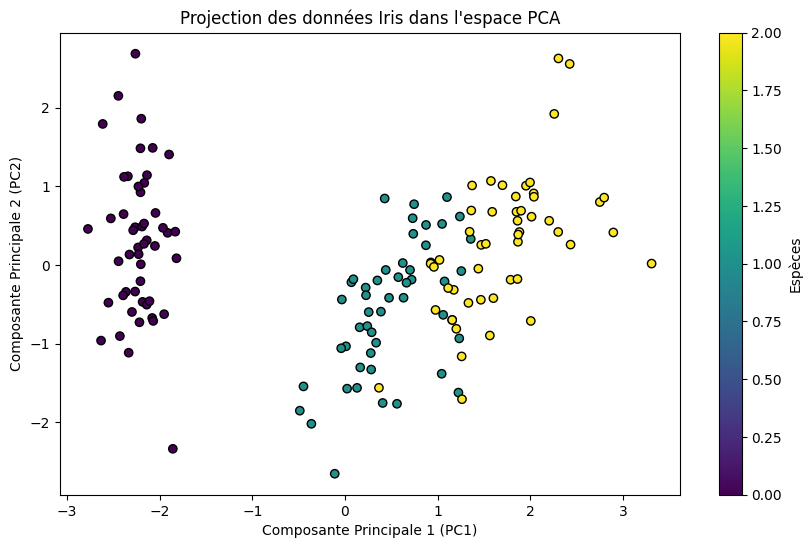

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chargement des données Iris
data = load_iris()
X = data.data  # Caractéristiques
y = data.target  # Labels

# Normalisation des données (standardisation)
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Création d'un objet PCA avec 2 composantes principales
pca = PCA(n_components=2)

# Ajustement de l'ACP sur les données standardisées
X_pca = pca.fit_transform(X_std)

# Création d'un DataFrame pour visualiser les composantes principales
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Affichage des premières lignes du DataFrame
print(pca_df.head())

# Variance expliquée par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_
print("Variance expliquée par PC1 :", explained_variance_ratio[0])
print("Variance expliquée par PC2 :", explained_variance_ratio[1])

# Visualisation des données projetées dans l'espace PCA
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=y, cmap='viridis', edgecolor='k')
plt.title("Projection des données Iris dans l'espace PCA")
plt.xlabel("Composante Principale 1 (PC1)")
plt.ylabel("Composante Principale 2 (PC2)")
plt.colorbar(label="Espèces")
plt.show()
